<a href="https://colab.research.google.com/github/Thuoq/Mastering-Computer-Vision-with-TensorFlow-2.x/blob/main/Chapter_4_Deep_Learning_on_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding CNNs and their parameters

Mạng thần kinh kết hợp (CNN) là một mạng tự học phân loại các hình ảnh tương tự như cách bộ não con người chúng ta học, bằng cách quan sát hình ảnh của các lớp khác nhau. CNN tìm hiểu nội dung của một hình ảnh bằng cách áp dụng lọc hình ảnh và bằng cách xử lý các phương pháp của nhiều kích thước bộ lọc, số lượng và các hoạt động phi tuyến tính. Các bộ lọc và hoạt động này được áp dụng trên nhiều lớp để kích thước không gian của mỗi lớp tiếp theo giảm xuống và độ sâu của chúng tăng lên trong quá trình biến đổi hình ảnh.

Đối với mỗi ứng dụng lọc, độ sâu của nội dung đã học sẽ tăng lên. Điều này bắt đầu với việc phát hiện cạnh, tiếp theo là nhận dạng các hình dạng, sau đó là một bộ sưu tập các hình dạng được gọi là đối tượng địa lý, v.v. Điều này tương tự như bộ não con người khi nói đến cách chúng ta lĩnh hội thông tin. Ví dụ, trong một bài kiểm tra về khả năng đọc hiểu, chúng ta cần trả lời năm câu hỏi về một đoạn văn, mỗi câu hỏi có thể được coi là một lớp yêu cầu thông tin cụ thể từ đoạn văn đó phải được trả lời:

1. Đầu tiên, chúng ta đọc lướt qua toàn bộ đoạn văn, có nghĩa là chiều không gian là đoạn văn hoàn chỉnh và độ sâu (mức độ hiểu của chúng tôi đối với đoạn văn) là thấp khi chúng tôi chỉ lướt qua nó.
2. Tiếp theo, chúng ta đọc lướt các câu hỏi để nắm được đặc điểm của từng lớp (câu hỏi) đó là nội dung cần tìm trong đoạn văn. Trong CNN, điều này tương đương với việc suy nghĩ về các phép toán **tích chập** và **pooling** sẽ được sử dụng để trích xuất các tính năng.
3. Sau đó, chúng tôi đọc các phần cụ thể của đoạn văn để tìm nội dung tương tự với lớp và đi sâu vào các phần đó - ở đây, chiều không gian thấp nhưng chiều sâu cao. Chúng tôi lặp lại quá trình này hai đến ba lần để trả lời tất cả các câu hỏi. Chúng tôi tiếp tục tăng chiều sâu hiểu biết của mình và tập trung hơn vào các lĩnh vực cụ thể (thu nhỏ kích thước) cho đến khi chúng tôi hiểu rõ. Trong CNN, điều này tương đương với việc tăng dần độ sâu và thu nhỏ kích thước - phép toán tích chập thay đổi độ sâu bằng cách thay đổi số lượng bộ lọc; gộp lại thu nhỏ kích thước.
4. Để tiết kiệm thời gian, chúng ta có xu hướng bỏ qua các đoạn văn để tìm các đoạn văn có liên quan phù hợp với câu trả lời. Trong tích chập, điều này tương đương với **strides**, thu nhỏ kích thước nhưng không thay đổi độ sâu.
5. Quá trình tiếp theo là kết hợp các câu hỏi với câu trả lời từ đoạn văn. Chúng tôi làm điều này bằng cách căn chỉnh các câu trả lời cho các câu hỏi. Ở đây, chúng tôi không đi sâu hơn nữa - chúng tôi đặt các câu hỏi và câu trả lời bên cạnh nhau để chúng tôi có thể so khớp chúng với bạn
6. Chúng tôi có thể có thông tin thừa trong quá trình này - chúng tôi loại bỏ thông tin đó để chỉ những thông tin liên quan đến các câu hỏi trong đoạn văn mới có sẵn cho chúng tôi. Trong CNN, điều này tương đương với việc **drop out**.
7. Giai đoạn cuối thực sự là thực hiện bài tập nối để trả lời các câu hỏi. Trong CNN, điều này tương đương với hoạt động Softmax.

Phương pháp lọc và xử lý hình ảnh của CNN bao gồm nhiều việc khác nhau, tất cả đều được thực hiện bằng cách sử dụng những điều sau:

1. Convolution (Conv2D)
2. Convolution over volume - 3x3 filter
3. Convolution over volume - 1x1 filter
4. Pooling 
5. Padding 
6. Stride
7. Activation
8. Fully connectec layer
9. Regularization
10. Drop out
11. Internal convarriance shifft and batch normalization 
12. Softmax 




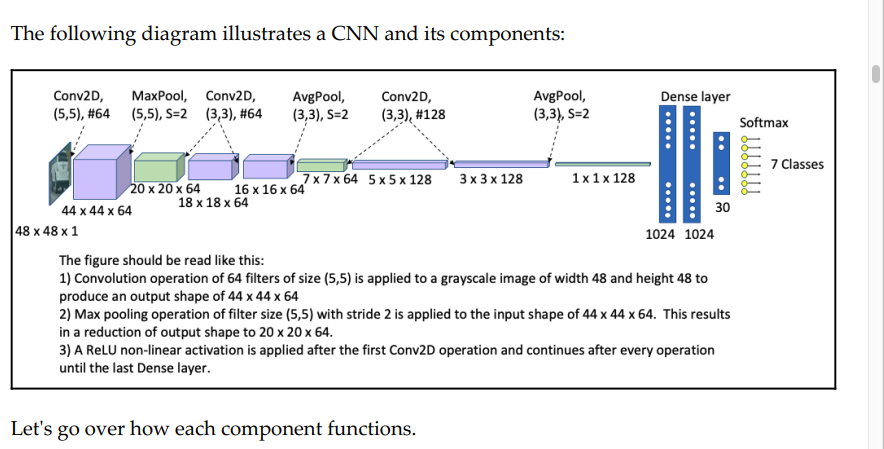

## Convolution 

The convolution là khối xây dựng chính của CNN, nó bao gồm việc nhân 1 phần của anh với 1 **kernel** (**filter**) để sinh ra output. Phép tính Convolution được hoạt động bằng cách nhân các phần tử của ảnh đầu vào  với kernel. Tại mọi vị trí, phép nhân ma trận khôn ngoan phần tử được thực hiện, theo sau là tổng tích lũy trên phạm vi nhân.

Sau khi mỗi phép tính tính chập, CNN học được 1 ít từ hìh ảnh, nó bắt đầu học các cạnh, và các hình dạng khác trong CNN tiếp theo, theo cách đặc điểm của ảnh. Xuyên suốt phép tính tích chập, cái **filter size** và number của filter nó có thể thay đổi. Thông thường, số lượng **filter** được tăng lên sau khi kích thước không gian của **features map** được giảm xuống thông qua các hoạt động tích hợp, **pooling** và **stride**. Độ sâu của **features map**  tăng lên khi bộ lọc tăng kích thước.

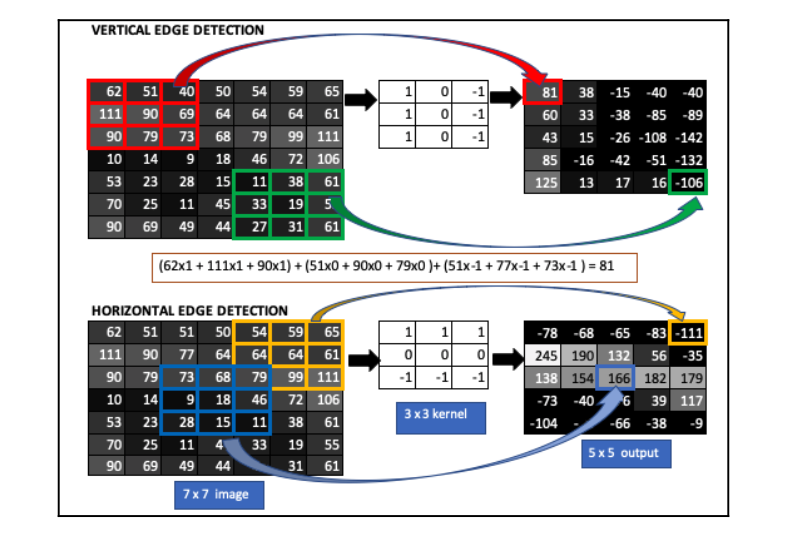

## Convolution over volume - 3x3 filter 

Trong ví dụ trên, chúng ta đã applied 3x3 convolution cho tất cả hình ảnh xám 2 chiều, chúng ta sẽ học làm thế nào vơi hình ảnh 3 chiều với 3 channels **Red,Green,Blue** và chuyển đổi nó bởi sửu dung 3x3 filter 


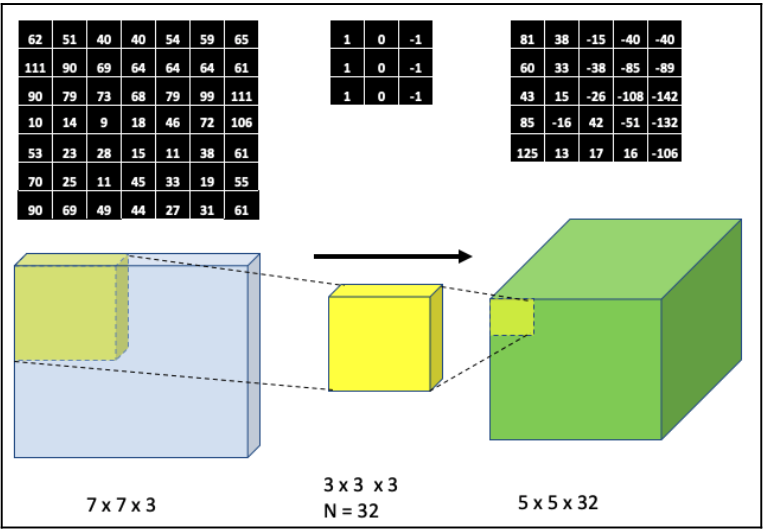

Sơ đồ trước cho thấy một phần của biểu đồ hình ảnh 7 x 7 có thể được biến đổi như thế nào bằng cách sử dụng bộ lọc 3 x 3 (bộ phát hiện cạnh) về mặt giảm chiều rộng và tăng chiều sâu (từ 3 lên 32). Mỗi 27 (3x3)  trong các ô in nhân ($f_i$)  sẽ nhân với 27 ô tương ứng với cell của input $A_i$. và + chúng tất cả với nhau thêm v ới thằng **RelU**.

Công thức ở trên như viết dưới đây: 

$$Z= \sum_{1}^{27}(A_i f_i +b_i)$$

Nói chung, trong một lớp tích chập, có nhiều bộ lọc thực hiện các kiểu phát hiện cạnh khác nhau. Trong ví dụ trước, chúng ta có 32 bộ lọc, dẫn đến 32 ngăn xếp khác nhau, mỗi ngăn xếp gồm 5 x 5 lớp.

Và nó xử lý như thằng Tensorflow là: 

```
tf.keras.layers.Conv2D(32,(3,3)
```

## Convolution over volume - 1x1 filter 

chúng ta sẽ tìm hiểu ý nghĩa của tích chập 1 x 1 và các trường hợp sử dụng của nó. A 1 x 1 convolution filter is a straight multiple of the image, as shown in the following diagram:

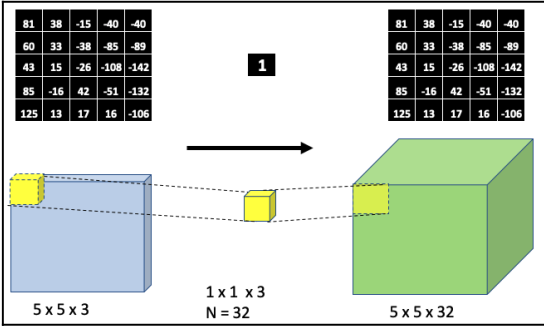

Trong sơ đồ trước, giá trị bộ lọc chập 1 x 1 của 1 đang được sử dụng trên đầu ra hình ảnh 5 x 5 từ phần trước, nhưng nó có thể là bất kỳ số nào trong thực tế. Ở đây, chúng ta có thể thấy rằng việc sử dụng bộ lọc 1 x 1 bảo toàn chiều cao và chiều rộng của nó, trong khi độ sâu tăng lên theo số kênh của bộ lọc. Đó chính là những lợi ích chính của 1x1 và cũng có công thức như 3x3

$$Z = \sum_{1}^{3}(A_i f_i +b_i)$$

Thực hiện công thức này trên

## Pooling 
Pooling là operator sau tích chập. Nó thường sử dụng để **feature map size** and **dimentionality** không thay đổi depth. Sô parameter trong pooling là 0. Có 2 loại kiểm pooling như chúng ta follow là 
* Max pooling 
* Average pooling

Trong maxpolling, chúng ta cắt 1 cửa sổ trong **features map** và lấy giá trị max, và còn trung bình thì lấy trung bình. được showw trong hình dưới.

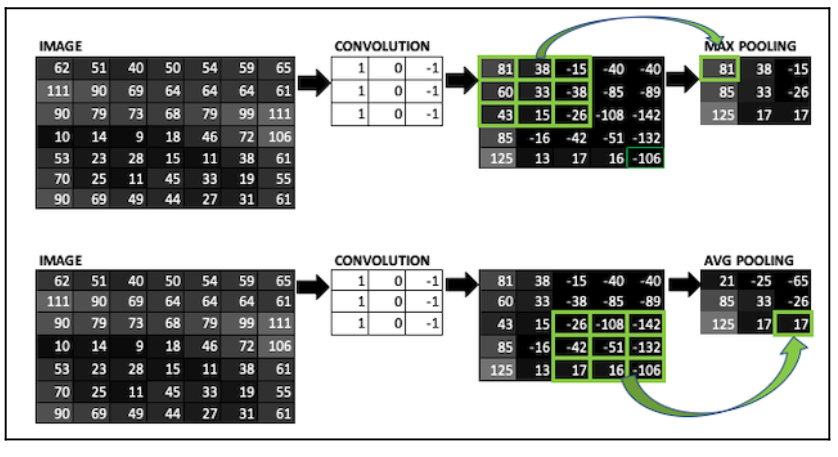


**Padding**
Padding thường được sử bảo tồn kích thước của features map. Với tích chập, hai vấn đề có thể
xảy ra và padding giải quyết cả hai:

* VỚi tích chập thì features map từ 7x7 xuống 5x5
* Thông tin ở cạnh bị mất do pixel ở cạnh chỉ bị thay đổi một lần, trong khi pixel ở giữa bị thay đổi nhiều lần bằng nhiều phép toán tích chập.

Hình ảnh dưới đây chỉ ra 1 padding operation của size =.  

**Lưu ý** cách padding bảo toàn kích thước để đầu ra có cùng kích thước **với** đầu vào

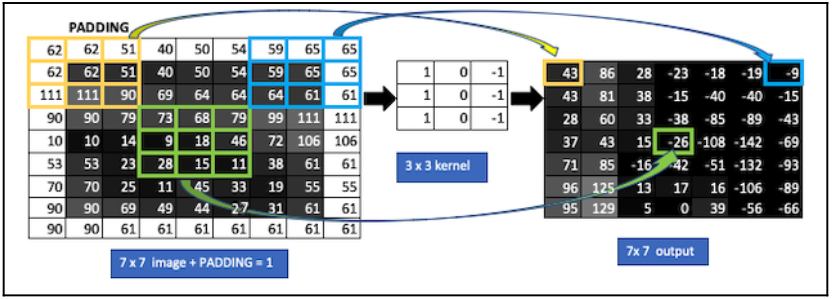

## Stride 
Thông thường, trong một phép chập, chúng ta di chuyển kernel stride , áp dụng một phép tích chập cho stride, v.v. stridecho phép chúng ta bỏ qua một bước. Hãy cùng xem:

* Khi stride =1.  Thì là normal và k bỏ qua 
* Khi stride =.  chúng ta bỏ qua 1 buộc, đây sẽ giảm hình ảnh từ 7x7 tới 3x3

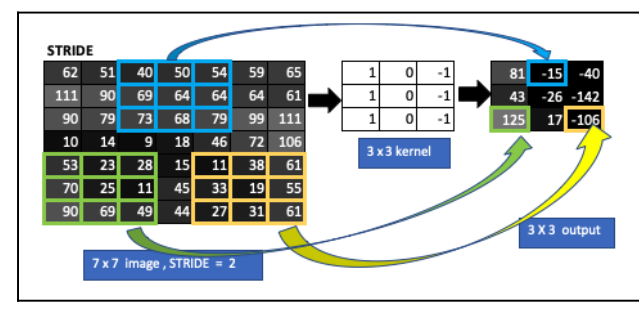

## Activation 

Lớp kích hoạt bổ sung tính phi tuyến tính cho mạng nơ-ron. Điều này rất quan trọng vì hình ảnh và đối tượng trong một hình ảnh là những vấn đề phi tuyến tính cao và hầu hết các chức năng khác trong CNN (Conv2D, gộp, các lớp được kết nối đầy đủ, v.v.) chỉ tạo ra các phép biến đổi tuyến tính. Hàm kích hoạt tạo ra sự không tuyến tính trong khi ánh xạ các giá trị đầu vào với các phạm vi của nó. Nếu không có chức năng kích hoạt, cho dù có thêm bao nhiêu lớp, kết quả cuối cùng vẫn sẽ là tuyến tính.

Có rất nhiều loại activation nhưng thường sử dụng nhất mà chúng ta đang dùng là 
* Sigmoid 
* Tanh
* ReLU 


Chức năng kích hoạt ReLU có những ưu điểm sau so với chức năng kích hoạt Tanh và Sigmoid:

* Sigmoid và Tanh có vấn đề về gradient biến mất (người học chậm) so với ReLU vì cả hai đều tiếp cận 1 ở giá trị đầu vào lớn hơn 3.

* Chức năng kích hoạt Sigmoid chỉ có giá trị dương đối với giá trị đầu vào nhỏ hơn 0.

* Các hàm ReLU có hiệu quả đối với tính toán. 

## Fully Connected layers 

## Regularization 

Regularization là 1 kỹ thuật thường dùng để giảm overfiiting. Nó thường thêm 1 phép tính vào (loss eror) để ngăn chặn weight model nhận các giá trị cực trị trong xuyến quá trình huấn luyện. Có 3 loại regularization thường được sử dụng CNN 

- L1 regularization. Cho mỗi model weight, w, thêm $\lambda |w|$
- L2 regularziation là add thêm $\frac{1}{2}\lambda w^2$
- Max norrm consstrain: là loại $|w| < c$

## Dropout 

Dropout là 1 loại regularization và nó đề cập tới việc loại bỏ 1 vài nơ ron trong mạng nơ ron. A dense layer với drop =0.2 nghĩa là chỉ có 80% hoạt động. Neurosn đã dừng trong cái bước hiện tại thì nó sẽ hoạt động cho next teo.Dropout đc áp dụng tới input nhưng kp thằng out put. 

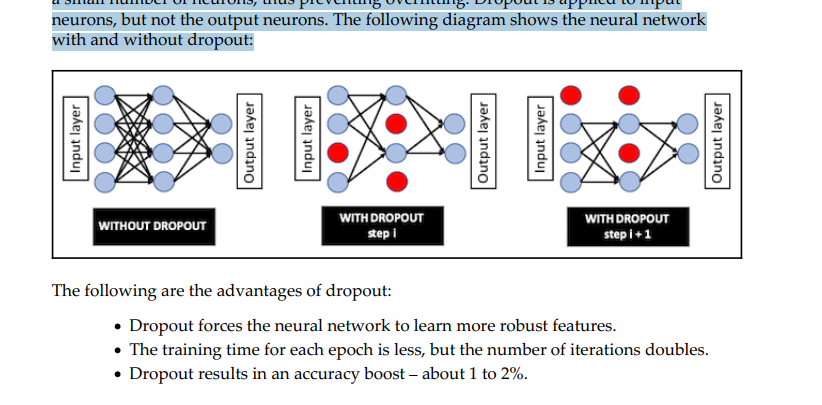

## Internal covariance shift and batch normalization

Trong quá trình đào tạo, sự phân bố đầu vào của mỗi lớp thay đổi khi hệ số trọng lượng của lớp trước đó thay đổi, điều này làm cho quá trình đào tạo bị chậm lại. Điều này là do nó yêu cầu tỷ lệ học tập thấp hơn và lựa chọn hệ số trọng lượng vấn đề này được gọi là **Internal Convariance shift** và cácch khắc phục là sử dụng Batch Normalization 

BN giải quyết vấn đề về sự thay đổi hiệp phương sai bằng cách trừ giá trị trung bình của lớp trước đó khỏi đầu vào hiện tại và chia nó với độ batch std . Đầu vào mới này sau đó được nhân với hệ số trọng số hiện tại và thêm vào số hạng thiên vị để tạo thành đầu ra. Sơ đồ sau đây cho thấy chức năng đầu ra trung gian của mạng nơ-ron, có và không có BN:

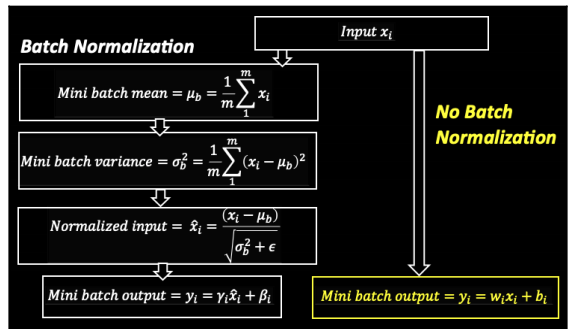

# Optimization CNN parameters 
CNN có nhiều tham số khác nhau. Đào tạo một mô hình CNN yêu cầu nhiều hình ảnh đầu vào và thực hiện xử lý, có thể rất tốn thời gian. Nếu các tham số được chọn không phải là tối ưu, toàn bộ quá trình phải được lặp lại một lần nữa. Đây là lý do tại sao điều quan trọng là phải hiểu các chức năng của từng tham số và mối quan hệ qua lại của chúng: để các giá trị của chúng có thể được tối ưu hóa trước khi chạy CNN để giảm thiểu các lần chạy lặp lại. Các tham số của CNN như sau:

* Image sizze = $(n * n)$
* filter = $f_h * f_w$
* number of filters = $n_f$
* Padding = p
* Strize = s
* Output size = $({\frac{(n+2p-f)}{s} + 1)} * ({\frac{(n+2p-f)}{s} + 1})$
* Number of parameters = ($f_h * f_w +1) * n_f $
